In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

In [20]:
import warnings
warnings.simplefilter('ignore')

In [21]:
train=pd.read_csv('blood-train.csv')
test=pd.read_csv('blood-test.csv')
#format_data=pd.read_csv('blood-format.csv')

In [22]:
train.head()

,Unnamed: 0,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
0,619,2,50,12500,98,1
1,664,0,13,3250,28,1
2,441,1,16,4000,35,1
3,160,2,20,5000,45,1
4,358,1,24,6000,77,0


In [23]:
print('Train- no of rows:{}\nTrain- no of cols:{}'.format(train.shape[0],train.shape[1]))
print('Test- no of rows:{}\nTest- no of cols:{}'.format(test.shape[0],test.shape[1]))

Train- no of rows:576
Train- no of cols:6
Test- no of rows:200
Test- no of cols:5


In [25]:
train.describe()

,Unnamed: 0,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
count,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000
mean,374.034722,9.439236,5.427083,1356.770833,34.050347,0.239583
std,216.947773,8.175454,5.740010,1435.002556,24.227672,0.427200
min,0.000000,0.000000,1.000000,250.000000,2.000000,0.000000
25%,183.750000,2.000000,2.000000,500.000000,16.000000,0.000000
50%,375.500000,7.000000,4.000000,1000.000000,28.000000,0.000000
75%,562.500000,14.000000,7.000000,1750.000000,49.250000,0.000000
max,747.000000,74.000000,50.000000,12500.000000,98.000000,1.000000


In [26]:
train['Made Donation in March 2007'].value_counts()

0    438
1    138
Name: Made Donation in March 2007, dtype: int64

In [30]:
Y=train.iloc[:,-1]
train.head()

,Unnamed: 0,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
0,619,2,50,12500,98,1
1,664,0,13,3250,28,1
2,441,1,16,4000,35,1
3,160,2,20,5000,45,1
4,358,1,24,6000,77,0


In [31]:
#Removing unamed column
old_train=train
old_test=test
train=train.iloc[:,1:5]
test=test.iloc[:,1:5]

In [32]:
train.head()

,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation
0,2,50,12500,98
1,0,13,3250,28
2,1,16,4000,35
3,2,20,5000,45
4,1,24,6000,77


In [33]:
test.head()

,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation
0,2,12,3000,52
1,21,7,1750,38
2,4,1,250,4
3,11,11,2750,38
4,4,12,3000,34


In [34]:
df=pd.merge(train,test)

In [35]:
df

,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation
0,2,2,500,4
1,2,2,500,4
2,2,2,500,4
3,2,2,500,4
4,2,2,500,4
...,...,...,...,...
805,16,2,500,16
806,16,2,500,16
807,16,3,750,21
808,14,3,750,35


In [37]:
#setting the independent variable and dependent variable

X=df.iloc[:,:]
X.head()

,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation
0,2,2,500,4
1,2,2,500,4
2,2,2,500,4
3,2,2,500,4
4,2,2,500,4


<AxesSubplot:ylabel='Months since Last Donation'>

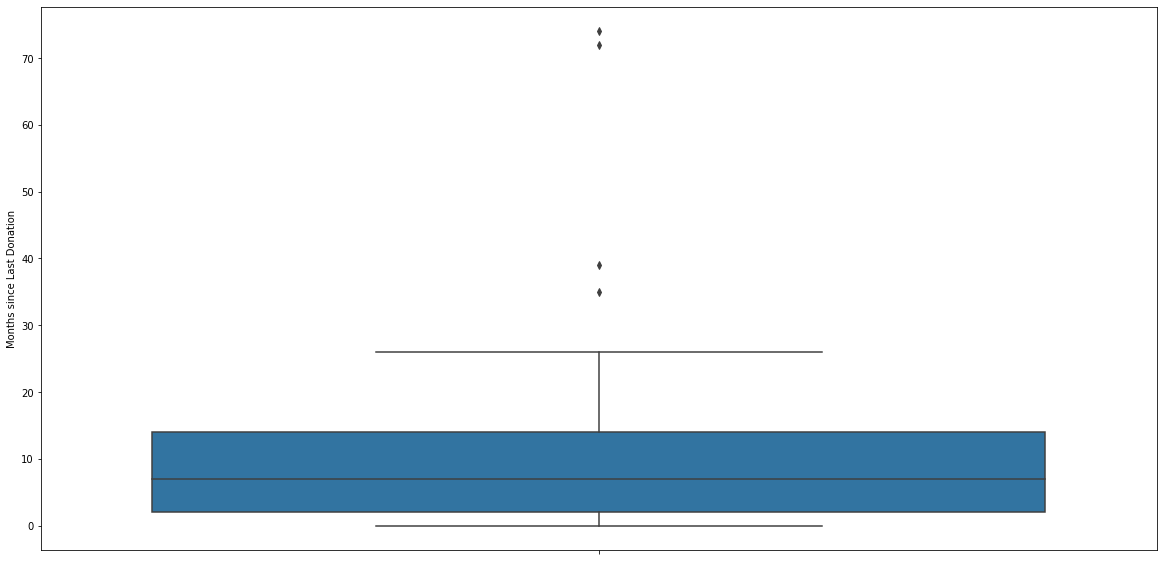

In [43]:
plt.figure(figsize=(20,10))
sns.boxplot(y="Months since Last Donation",data=old_train)

We see from above boxplot that the maximum people have donated blood in nearby 10 months

<AxesSubplot:>

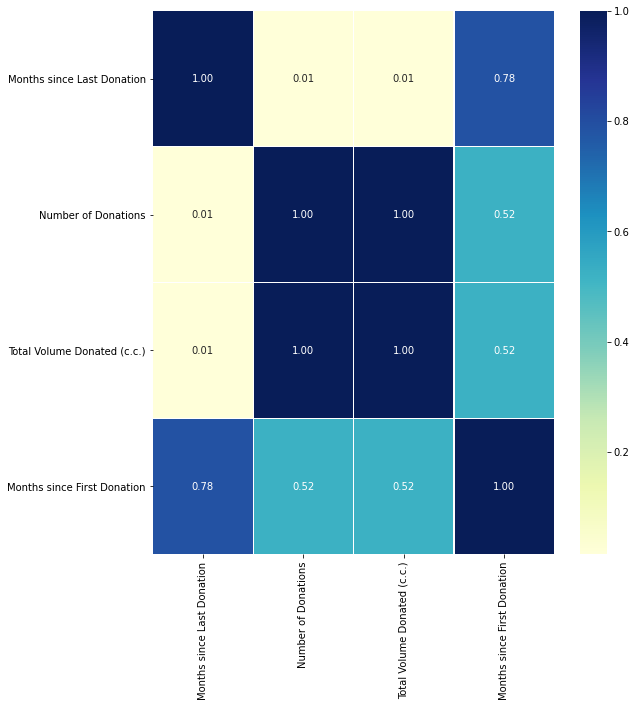

In [45]:
#Correlation between all variables 
corrmat=X.corr()
f,axis=plt.subplots(figsize=(9,10))
sns.heatmap(corrmat,ax=axis,cmap='YlGnBu',linewidths=0.1,fmt='.2f',annot=True)

In [46]:
#printing all unique value for Month since last donation
train['Months since Last Donation'].unique()

array([ 2,  0,  1,  4,  5,  3, 12,  6, 11,  9, 10, 13, 14,  8,  7, 16, 23,
       21, 18, 22, 26, 35, 74, 15, 20, 17, 25, 39, 72], dtype=int64)